# **Optimization for Deep learning**

**Author** : Ryan BOUSTANY

**Session 2:**
- Build perceptron with Pytorch
- Build a neural network with Pytorch
- Train a perceptron and neural network with mini-batch gradient descent

In [1]:
import torch
import torch.nn as nn  # neural networks module
import torch.nn.functional as F # activation functions
from torch.utils.data import Dataset, DataLoader
import random

import torchvision
import torchvision.transforms as transforms

import torch.optim as optim


import numpy as np
import matplotlib.pyplot as plt

## **Build and train a perceptron with Pytorch**

A simple perceptron is a binary classifier that maps an input vector $ \mathbf{x} $ to an output $ f(\mathbf{x}) $ through a linear prediction function followed by an activation function.
The output $ f(\mathbf{x}) $ of the perceptron is calculated as:
\begin{align*}
f(\mathbf{x}) = \text{activation} \left( \mathbf{w} \cdot \mathbf{x} + b \right),
\end{align*}
where $ \mathbf{w} $ is the weight vector, $ b $ is the bias term, $ \cdot $ denotes the dot product, and $\text{activation}()$ is an activation function such as the step function or the sigmoid function.

A commonly used loss function for the simple perceptron is the Binary Cross-Entropy loss, defined as:
\begin{align*}
L(w, b) = -\frac{1}{N} \sum_{i=1}^{N} \left[ y_i \log(f(\mathbf{x}_i)) + (1 - y_i) \log(1 - f(\mathbf{x}_i)) \right],
\end{align*}
where $ N $ is the number of samples, $ y_i $ is the true label of the $ i $-th sample, and $ f(\mathbf{x}_i) $ is the predicted label.

The goal of the learning process is to find the optimal parameters $ \mathbf{w} $ and $ b $ that minimize the loss function $ L $. This is commonly achieved using gradient descent.

The update rules for the weights and bias in each iteration $ t $ are:
\begin{align*}
&\mathbf{w}_{t+1} = \mathbf{w}_{t} - \eta \nabla_{\mathbf{w}} L,
&b_{t+1} = b_{t} - \eta \nabla_{b} L,
\end{align*}
where $ \eta $ is the learning rate, and $ \nabla_{\mathbf{w}} L $ and $ \nabla_{b} L $ are the gradients of the loss function with respect to $ \mathbf{w} $ and $ b $ respectively.


### Implemetation and training from scratch 

In [2]:
# Importing the torch library for basic tensor operations
import torch

# Hyperparameters
num_samples = 1000
input_dim = 2
learning_rate = 0.1
epochs = 1000

# Initialize weights and bias randomly
weights = torch.randn(input_dim, 1, requires_grad=True)
bias = torch.randn(1, requires_grad=True)
# Create synthetic dataset
X_data = torch.tensor([[random.randint(0, 1), random.randint(0, 1)] for _ in range(num_samples)], dtype=torch.float32)
y_data = torch.tensor([[x[0] * x[1]] for x in X_data], dtype=torch.float32)


# Binary Cross-Entropy Loss Function
def binary_cross_entropy(y_pred, y_true):
    return -torch.mean(y_true * torch.log(y_pred) + (1 - y_true) * torch.log(1 - y_pred)) ## TO DO

In [3]:
# Training loop
for epoch in range(epochs):
    # Forward pass
    linear_output = torch.mm(X_data, weights) + bias ## TO DO
    y_pred = torch.sigmoid(linear_output) ## TO DO
    
    # Compute loss
    loss = binary_cross_entropy(y_pred, y_data)
    
    # Backward pass and optimization
    loss.backward()
    
    # Manual update of weights and bias
    with torch.no_grad():
        weights -= learning_rate * weights.grad ## TODO
        bias -= learning_rate * bias.grad ## TODO
        
        # Clear previous gradients
        weights.grad.zero_()
        bias.grad.zero_()
    
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


Epoch [100/1000], Loss: 0.3587
Epoch [200/1000], Loss: 0.2982
Epoch [300/1000], Loss: 0.2567
Epoch [400/1000], Loss: 0.2260
Epoch [500/1000], Loss: 0.2021
Epoch [600/1000], Loss: 0.1829
Epoch [700/1000], Loss: 0.1670
Epoch [800/1000], Loss: 0.1537
Epoch [900/1000], Loss: 0.1424
Epoch [1000/1000], Loss: 0.1325


In [4]:
# Test the model on the original small dataset for accuracy
def calculate_accuracy(y_pred, y_true):
    predicted_classes = (y_pred > 0.5).float()
    correct = (predicted_classes == y_true).float().sum()
    accuracy = correct / y_true.shape[0]
    return accuracy * 100

with torch.no_grad():
    test_data = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
    y_true = torch.tensor([[0], [0], [0], [1]], dtype=torch.float32)
    
    linear_output = torch.mm(test_data, weights) + bias
    y_pred = torch.sigmoid(linear_output)
    
    test_accuracy = calculate_accuracy(y_pred, y_true)
    
print(f'Test Accuracy on the small test dataset: {test_accuracy.item():.2f}%')


Test Accuracy on the small test dataset: 100.00%


### Implemetation and training using Pytorch functions 

In [5]:
# Defining the Simple Perceptron class using PyTorch
class SimplePerceptron(nn.Module):
    def __init__(self, input_dim):
        super(SimplePerceptron, self).__init__()
        self.fc = nn.Linear(input_dim, 1)  # Single-layer perceptron with one output unit
    
    def forward(self, x):
        output = self.fc(x)
        return torch.sigmoid(output)  # Using sigmoid activation function

# Hyperparameters
input_dim = 2  # Dimensionality of the input
learning_rate = 0.1
epochs = 1000

# Create synthetic dataset (AND operation)
X_data = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y_data = torch.tensor([[0], [0], [0], [1]], dtype=torch.float32)

# Initialize the perceptron
model = SimplePerceptron(input_dim)

# Loss and optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(epochs):
    # Forward pass
    outputs = model(X_data)
    loss = criterion(outputs, y_data)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 0.5623
Epoch [200/1000], Loss: 0.4188
Epoch [300/1000], Loss: 0.3372
Epoch [400/1000], Loss: 0.2843
Epoch [500/1000], Loss: 0.2468
Epoch [600/1000], Loss: 0.2185
Epoch [700/1000], Loss: 0.1962
Epoch [800/1000], Loss: 0.1781
Epoch [900/1000], Loss: 0.1631
Epoch [1000/1000], Loss: 0.1504


In [6]:
with torch.no_grad():
    test_data = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
    y_true = torch.tensor([[0], [0], [0], [1]], dtype=torch.float32)
    
    linear_output = torch.mm(test_data, weights) + bias
    y_pred = torch.sigmoid(linear_output)
    
    test_accuracy = calculate_accuracy(y_pred, y_true)
    
print(f'Test Accuracy on the small test dataset: {test_accuracy.item():.2f}%')

Test Accuracy on the small test dataset: 100.00%


## **Neural Network for MNIST Classification with Pytorch (to go beyond)**

We introduce a simple neural network designed to classify handwritten digits from the MNIST dataset. We will cover the architecture of the neural network, the Stochastic Gradient Descent (SGD) optimization technique, and the MNIST dataset itself.

### MNIST Dataset

The MNIST dataset consists of 60,000 training images and 10,000 test images. Each image is a grayscale 28x28 pixel representation of a handwritten digit between 0 and 9. The dataset is often used for educational purposes as a starting point for image classification tasks.

### Neural Network Architecture

#### Mathematical Formulation

The neural network consists of an input layer, one hidden layer, and an output layer. The forward pass is mathematically described as:


$$
\begin{aligned}
\text{Input Layer:} \quad & \mathbf{x} \in \mathbb{R}^{784} \\
\text{Hidden Layer:} \quad & \mathbf{h} = \text{ReLU}(\mathbf{W}_1 \mathbf{x} + \mathbf{b}_1) \\
\text{Output Layer:} \quad & \mathbf{o} = \mathbf{W}_2 \mathbf{h} + \mathbf{b}_2 \\
\text{Softmax:} \quad & \mathbf{p} = \text{Softmax}(\mathbf{o}) \in \mathbb{R}^{10} \text{ (10 because digit between 0 and 9)}
\end{aligned}
$$

where $ \mathbf{W}_1 $, $ \mathbf{W}_2 $, $ \mathbf{b}_1 $, and $ \mathbf{b}_2 $ are learnable parameters of the network.

#### Parameters

- $ \mathbf{W}_1 $ : Weight matrix for the input to hidden layer transformation
- $ \mathbf{b}_1 $ : Bias vector for the hidden layer
- $ \mathbf{W}_2 $ : Weight matrix for the hidden to output layer transformation
- $ \mathbf{b}_2 $ : Bias vector for the output layer

#### Loss function 

The loss function used for this problem is the cross-entropy loss, described as:

\begin{align*}
L(\theta) = - \frac{1}{N} \sum_{i=1}^{N} \sum_{j=1}^{C} y_{ij} \log(p_{ij})
\end{align*}

where $N$ is the number of samples, $C$ is the number of classes (here 10 because we predict digit between 0 and 9 ), $y_{ij}$ is the true label, and $p_{ij}$ is the predicted probability.


### Stochastic Gradient Descent (SGD)

#### Update Rules

The optimization problem aims to minimize a loss function $ L(\theta) $ where $ \theta $ represents the network parameters. The update rule for each parameter $ \theta_i $ in SGD is:

$$
\theta_i^{(t+1)} = \theta_i^{(t)} - \eta \nabla_{\theta_i} L
$$

Where $ \eta $ is the learning rate and $ \nabla_{\theta_i} L $ is the gradient of the loss with respect to $ \theta_i $.


In [9]:
# Hyperparameters
batch_size = 128
learning_rate = 0.001
epochs = 10

# Loading MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Neural Network model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
    
    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return nn.functional.log_softmax(x, dim=1)

# Initialize the model, loss, and optimizer
model = NeuralNetwork()
criterion = nn.CrossEntropyLoss() # loss function Cross entropy
optimizer = optim.SGD(model.parameters(), lr=learning_rate)  # use SGD optimizer 


train_loss_list = []

# Training loop
for epoch in range(epochs):
    epoch_loss = 0
    for i, (images, labels) in enumerate(train_loader):
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        
    # Calculate average epoch loss
    average_epoch_loss = epoch_loss / len(train_loader)
    train_loss_list.append(average_epoch_loss)

        
    if (epoch + 1) % 1 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Average Loss: {average_epoch_loss:.4f}')



Epoch [1/10], Average Loss: 2.2670
Epoch [2/10], Average Loss: 2.1823
Epoch [3/10], Average Loss: 2.0611
Epoch [4/10], Average Loss: 1.8964
Epoch [5/10], Average Loss: 1.6808
Epoch [6/10], Average Loss: 1.4307
Epoch [7/10], Average Loss: 1.1919
Epoch [8/10], Average Loss: 0.9994
Epoch [9/10], Average Loss: 0.8572
Epoch [10/10], Average Loss: 0.7547


In [10]:
# Test the model
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f'Test Accuracy on the MNIST test dataset: {test_accuracy:.2f}%')

Test Accuracy on the MNIST test dataset: 82.96%


**Question 1.** Test performance of the newtork with 1,10 epochs and look at the test accuracy ? Comments.

**Question 2.** Plot the train loss.

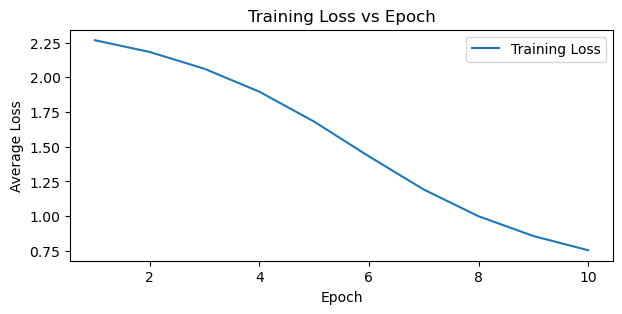

In [11]:
# Plotting the training loss
plt.figure(figsize=(7, 3))
plt.plot(range(1, epochs + 1), train_loss_list, label='Training Loss') ## TO DO
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.title('Training Loss vs Epoch')
plt.legend()
plt.show()

Congrats ! This is your first neural network training